In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [10]:
# Load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize (scale pixel values to 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension (grayscale = 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [11]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # 👈 Dropout added here
    layers.Dense(10, activation='softmax')
])


In [12]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.1,
                    callbacks=[early_stop])



Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8603 - loss: 0.4392 - val_accuracy: 0.9853 - val_loss: 0.0501
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9736 - loss: 0.0882 - val_accuracy: 0.9872 - val_loss: 0.0457
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9826 - loss: 0.0573 - val_accuracy: 0.9872 - val_loss: 0.0395
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9855 - loss: 0.0480 - val_accuracy: 0.9903 - val_loss: 0.0335
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9879 - loss: 0.0358 - val_accuracy: 0.9905 - val_loss: 0.0348
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9903 - loss: 0.0307 - val_accuracy: 0.9900 - val_loss: 0.0359
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9921 - loss: 0.0226 - val_accuracy: 0.9915 - val_loss: 0.0341
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9923 -

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9890 - loss: 0.0367
Test accuracy: 0.9916


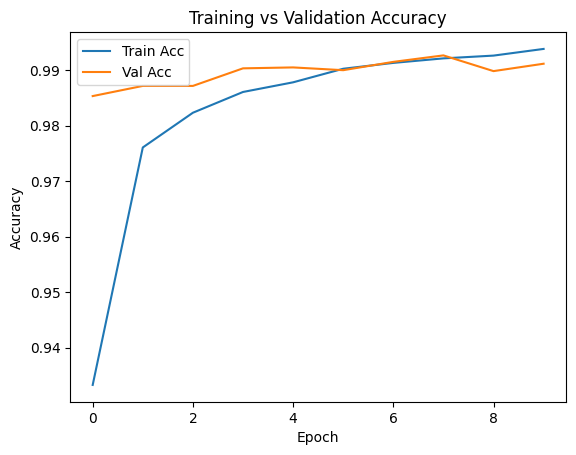

In [15]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()
